### Simple Linear Regression

In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [2]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [3]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [4]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

In [5]:
# Checking Relationship between two variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

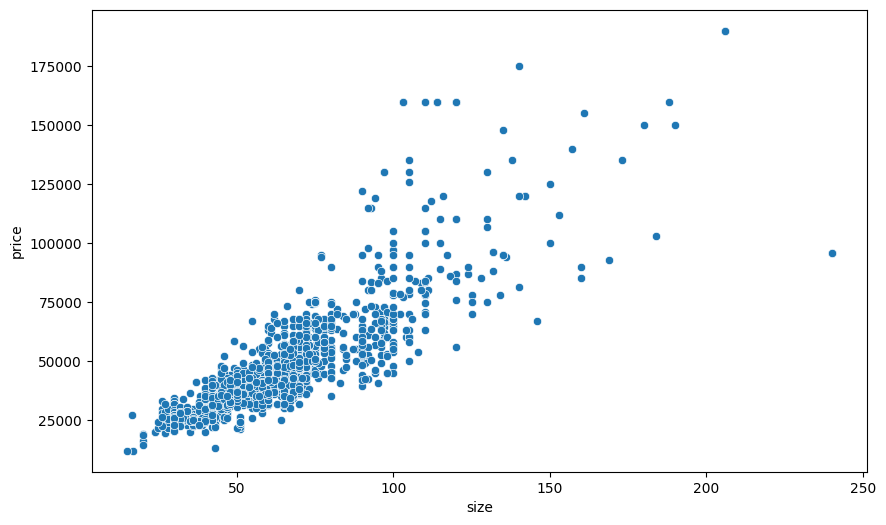

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

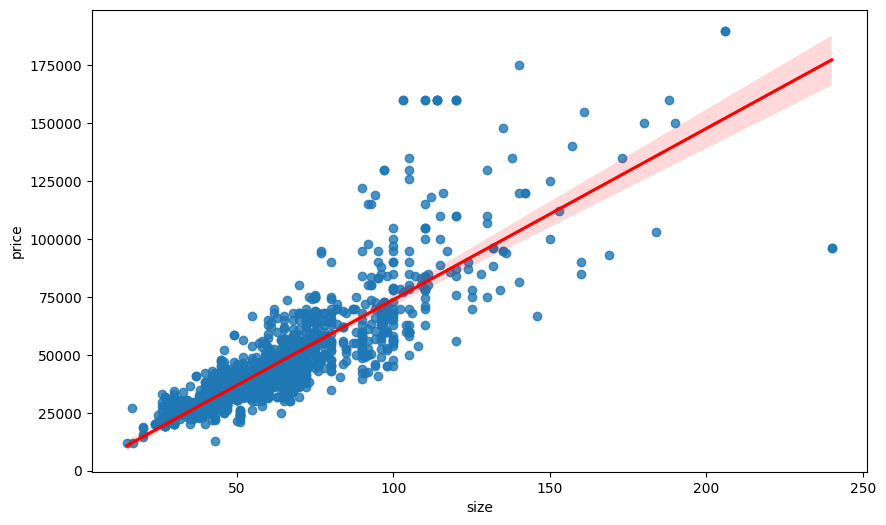

In [7]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [28]:
# y = kx + b
a1 = 0
b1 = 0
for i in range(0,len(X)):
    a = (X.iloc[i]-X.mean())*(y.iloc[i] - y.mean())
    b = (X.iloc[i] - X.mean())**2
    a1 = a1+a
    b1 = b1+b
k = a1/b1
b = y.mean()-k*X.mean()
print(f"y = {k}X{b}")


y = 740.0264822713287X-195.94911352690542


In [37]:
X_test = X.sample(10)
test_labels = y.loc[X_test.index]

In [43]:
Y_predicted = k*X_test +b
Y_predicted

5243    66406.434291
7314    47165.745752
288     53085.957610
6550    73806.699114
2996    50125.851681
6022    53085.957610
3435    49385.825199
15      25704.977766
5506    50125.851681
6448    24224.924801
Name: size, dtype: float64

In [46]:
test_labels

5243    60000.0
7314    40000.0
288     37700.0
6550    45000.0
2996    37500.0
6022    57000.0
3435    42000.0
15      22500.0
5506    45000.0
6448    25000.0
Name: price, dtype: float64

In [49]:
#checking mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_predicted, test_labels)
mae

9079.646068137847

### Simple Linear Regression using Sklearn

In [50]:
#Splitng our data into Train and Test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.1, random_state = 42)

In [57]:
#Training our model
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

X_train = np.asanyarray(train_set[['size']])
Y_train = np.asanyarray(train_set[['price']])

LR_model.fit(X_train, Y_train)

#Finding k and b
k1 = LR_model.coef_[0][0]
b1 = LR_model.intercept_[0]
print(f"y = {k1}X+{b1}")

y = 732.7784051414766X+106.31843170110369


Text(0, 0.5, 'price')

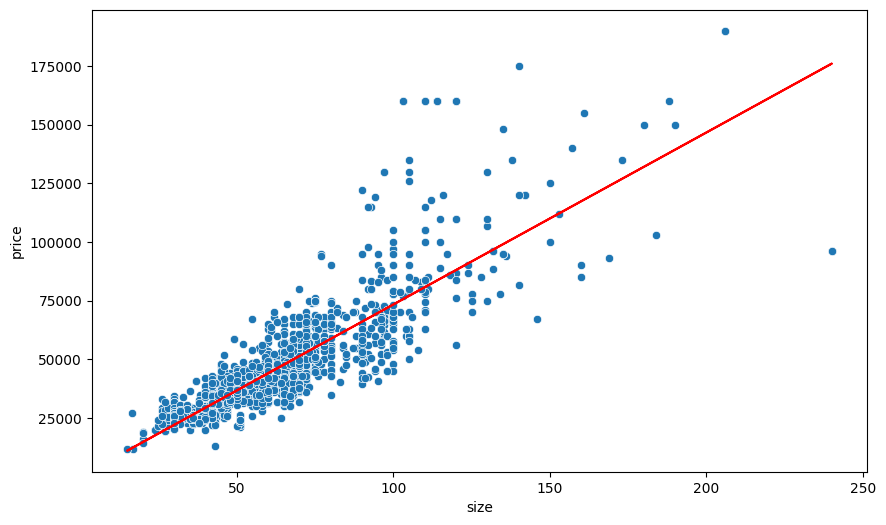

In [59]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = housing, x= 'size', y = 'price')
plt.plot(X_train, k1*X_train+b1, '-r')
plt.xlabel('size')
plt.ylabel('price')

In [60]:
# Evaluating model
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [61]:
y_predicted = LR_model.predict(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_predicted)
rsme = mean_squared_error(y_test, y_predicted)
print(f"MAE = {mae}")
print(F"RMSE = {np.sqrt(rsme)}")

MAE = 7269.709648262382
RMSE = 12734.803748258666


### Multiple Linear Regression

In [66]:
# train_test_split
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [76]:
# Machine learning
MLR_model =  LinearRegression()
x_train = np.asanyarray(train_set[['size', 'max_levels']])
#x_train = np.asanyarray(train_set[['rooms','size','level', 'max_levels']])
y_train = np.asanyarray(train_set[['price']])

MLR_model.fit(x_train, y_train)

print('Coefficients: ', MLR_model.coef_)
print('Intercept: ', MLR_model.intercept_)

Coefficients:  [[ 747.04795007 -393.4032521 ]]
Intercept:  [1341.57534414]


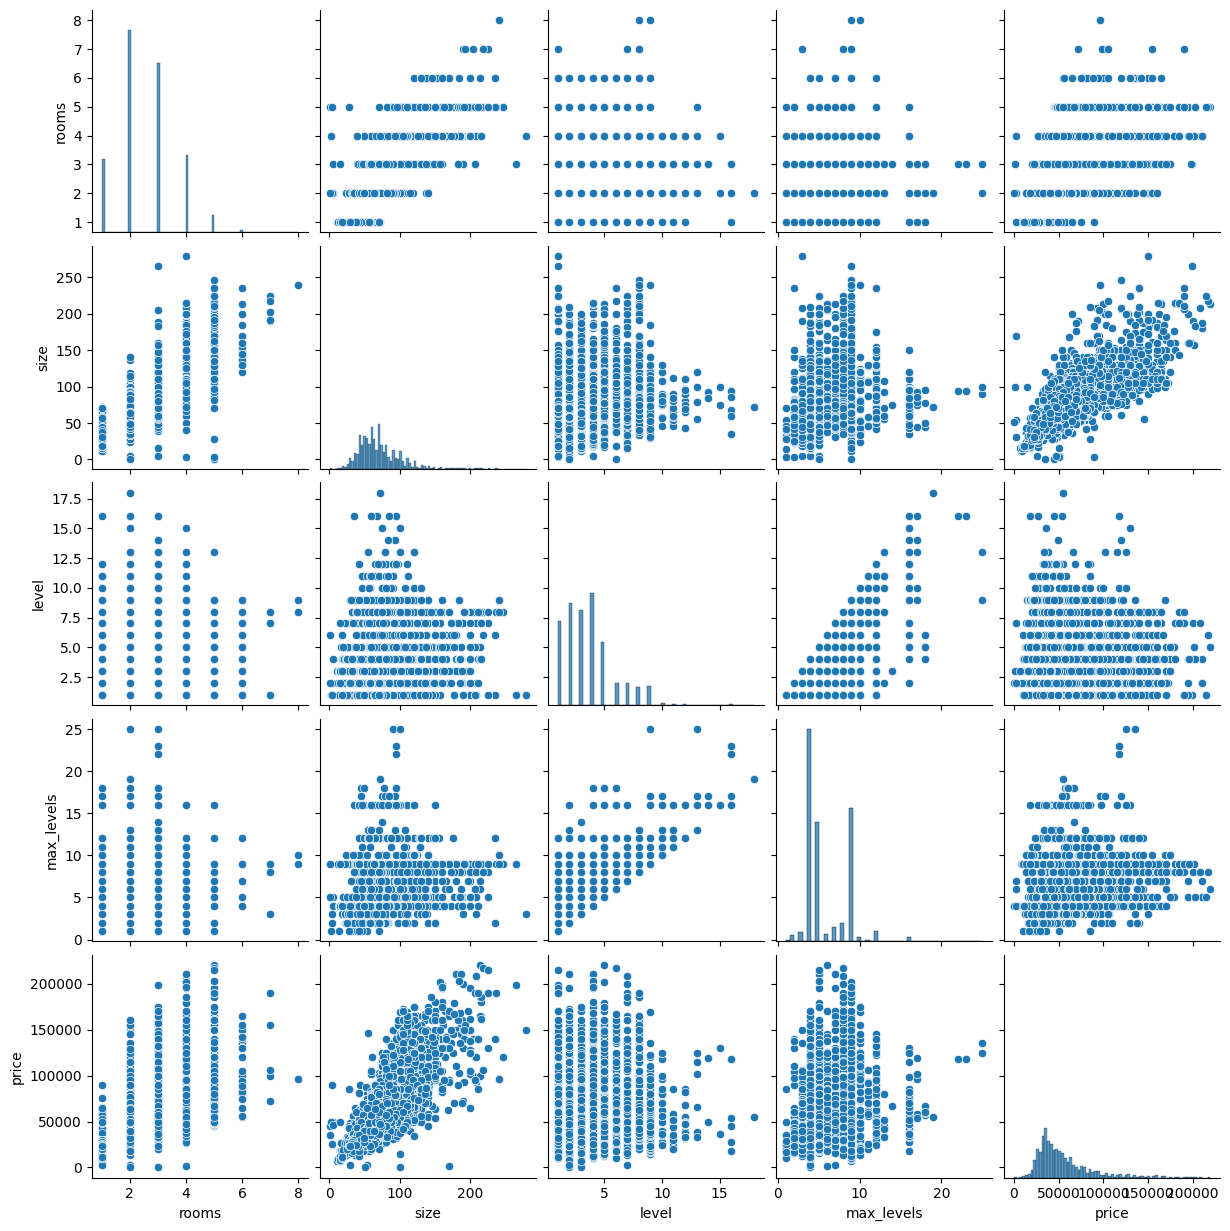

In [75]:
# Seeing corrolation between variable through graphs
sns.pairplot(df[['rooms','size','level', 'max_levels', 'price']])
plt.show()

In [77]:
# Evaluating the model
x_test = np.asanyarray(test_set[['size', 'max_levels']])
#x_test = np.asanyarray(test_set[['rooms','size','level', 'max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_predict = MLR_model.predict(x_test)

In [78]:
MAE = mean_absolute_error(y_test, y_predict)
RMSE = mean_squared_error(y_test, y_predict)
print(f"MAE: {MAE} \n RSME: {np.sqrt(RMSE)}")

MAE: 7193.92237806578 
 RSME: 12635.660248895361
